In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-03-05_38_29/log.json', 'r') as f:
    data = json.load(f)
    
l = len(data["loss"])
print(f"{l} records")
print(data.keys())

94001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

# Accuracy
accuracy = { k: v for k, v in enumerate(data["accuracy"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(math.trunc(float(current - previous))), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {percent_list}")
    print(f"Minimum: {min(data.values())}")

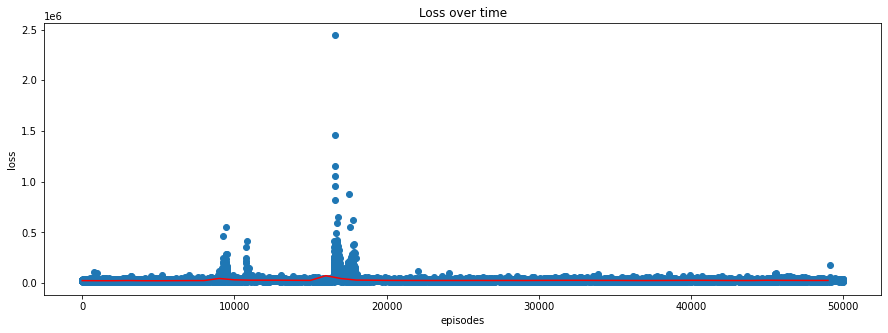

Maximum: 2442786.25
Average: 27158.058897509767
Moving Average: ['-4% (-1029 | -4%)', '0% (-109 | -4%)', '+7% (1708 | 2%)', '-7% (-1769 | -5%)', '0% (-182 | -5%)', '+3% (758 | -2%)', '+3% (799 | 0%)', '+0% (187 | 1%)', '+85% (20645 | 88%)', '-30% (-13622 | 31%)', '-10% (-3334 | 17%)', '+0% (165 | 17%)', '0% (-77 | 17%)', '-4% (-1184 | 12%)', '-2% (-708 | 9%)', '+178% (46190 | 204%)', '-38% (-27964 | 86%)', '-35% (-15571 | 20%)', '-2% (-820 | 17%)', '-6% (-1780 | 9%)', '-2% (-670 | 6%)', '0% (-113 | 6%)', '-1% (-481 | 4%)', '+1% (393 | 6%)', '0% (-155 | 5%)', '+1% (491 | 7%)', '-2% (-544 | 5%)', '+1% (430 | 6%)', '-2% (-546 | 4%)', '+3% (812 | 8%)', '+2% (535 | 10%)', '+1% (372 | 11%)', '0% (-38 | 11%)', '-3% (-919 | 7%)', '+0% (235 | 8%)', '-3% (-861 | 5%)', '-1% (-474 | 3%)', '+2% (569 | 5%)', '+3% (793 | 8%)', '+2% (701 | 11%)', '0% (-85 | 11%)', '-3% (-1042 | 7%)', '-2% (-696 | 4%)', '0% (-19 | 4%)', '+9% (2421 | 14%)', '-3% (-935 | 10%)', '-1% (-358 | 8%)', '-2% (-633 | 6%)', '+1% 

In [5]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

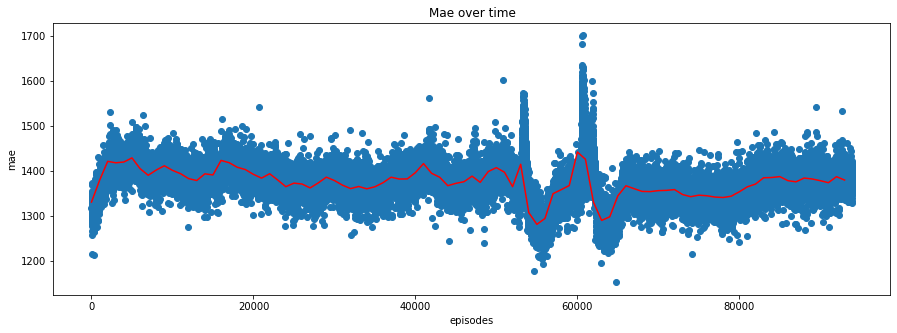

Maximum: 1700.4251708984375
Average: 1374.6954165495113
Moving Average: ['+3% (48 | 3%)', '+3% (42 | 6%)', '0% (-3 | 6%)', '+0% (1 | 6%)', '+0% (9 | 7%)', '-1% (-23 | 5%)', '-1% (-14 | 4%)', '+0% (11 | 5%)', '+0% (9 | 6%)', '0% (-10 | 5%)', '0% (-7 | 4%)', '0% (-10 | 3%)', '0% (-4 | 3%)', '+1% (14 | 4%)', '0% (-2 | 4%)', '+2% (32 | 6%)', '0% (-5 | 6%)', '0% (-10 | 5%)', '0% (-5 | 5%)', '0% (-10 | 4%)', '0% (-8 | 3%)', '+0% (9 | 4%)', '-1% (-13 | 3%)', '-1% (-14 | 2%)', '+0% (7 | 3%)', '0% (-2 | 3%)', '0% (-8 | 2%)', '+0% (10 | 3%)', '+0% (12 | 4%)', '0% (-7 | 3%)', '0% (-10 | 2%)', '0% (-7 | 2%)', '+0% (4 | 2%)', '0% (-5 | 2%)', '+0% (4 | 2%)', '+0% (9 | 3%)', '+0% (12 | 4%)', '0% (-4 | 3%)', '+0% (0 | 3%)', '+1% (13 | 4%)', '+1% (20 | 6%)', '-1% (-21 | 4%)', '0% (-8 | 4%)', '-1% (-18 | 2%)', '+0% (5 | 3%)', '+0% (3 | 3%)', '+0% (12 | 4%)', '0% (-13 | 3%)', '+1% (24 | 5%)', '+0% (8 | 5%)', '0% (-10 | 4%)', '-2% (-32 | 2%)', '+3% (49 | 6%)', '-7% (-107 | -1%)', '-1% (-26 | -3%)', '+1% (

In [6]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

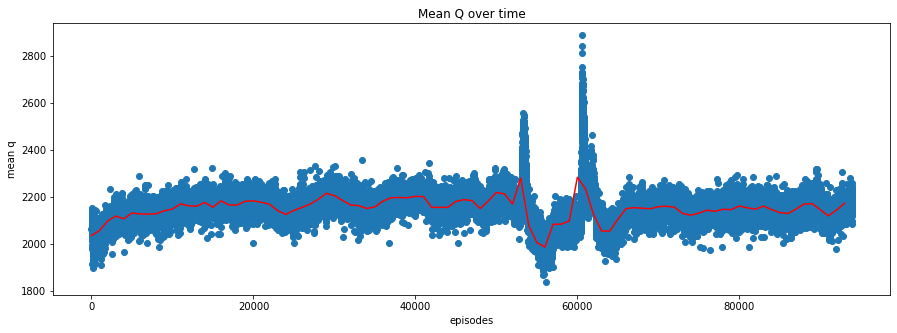

Maximum: 2887.6953125
Average: 2150.536616775187
Moving Average: ['+1% (21 | 1%)', '+1% (40 | 3%)', '+0% (20 | 4%)', '0% (-11 | 3%)', '+1% (24 | 4%)', '0% (-4 | 4%)', '0% (0 | 4%)', '+0% (1 | 4%)', '+0% (12 | 5%)', '+0% (7 | 5%)', '+1% (22 | 6%)', '0% (-8 | 6%)', '0% (-1 | 6%)', '+0% (15 | 6%)', '0% (-20 | 5%)', '+1% (26 | 7%)', '0% (-17 | 6%)', '+0% (0 | 6%)', '+0% (15 | 7%)', '+0% (1 | 7%)', '0% (-6 | 6%)', '0% (-8 | 6%)', '-1% (-27 | 5%)', '0% (-15 | 4%)', '+0% (17 | 5%)', '+0% (12 | 5%)', '+0% (13 | 6%)', '+0% (20 | 7%)', '+1% (25 | 8%)', '0% (-9 | 8%)', '0% (-20 | 7%)', '0% (-19 | 6%)', '0% (-2 | 6%)', '0% (-12 | 5%)', '+0% (6 | 6%)', '+1% (24 | 7%)', '+0% (14 | 7%)', '+0% (1 | 7%)', '0% (-1 | 7%)', '+0% (6 | 8%)', '0% (0 | 8%)', '-2% (-45 | 5%)', '0% (0 | 5%)', '+0% (0 | 5%)', '+1% (24 | 7%)', '+0% (8 | 7%)', '0% (-4 | 7%)', '-1% (-33 | 5%)', '+1% (32 | 7%)', '+1% (36 | 9%)', '0% (-6 | 8%)', '-1% (-43 | 6%)', '+5% (111 | 12%)', '-8% (-202 | 2%)', '-3% (-73 | -1%)', '0% (-18 | -2%

In [7]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

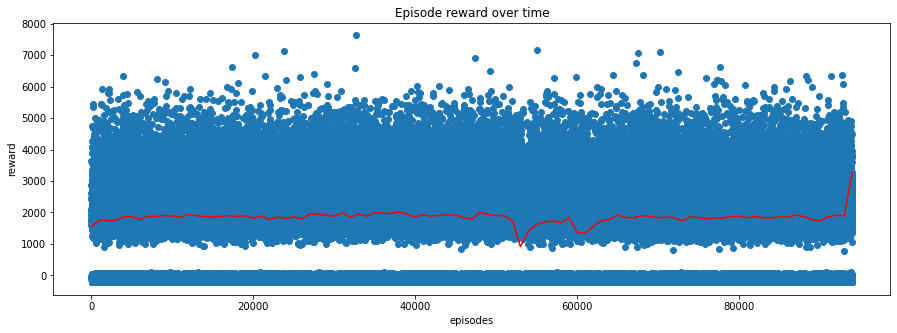

Maximum: 7629.043076922744
Average: 1823.0419347637117
Moving Average: ['+13% (202 | 13%)', '-1% (-18 | 11%)', '+0% (6 | 12%)', '+6% (113 | 19%)', '+0% (8 | 20%)', '-5% (-94 | 14%)', '+6% (108 | 21%)', '0% (-13 | 20%)', '+1% (34 | 22%)', '0% (-15 | 21%)', '-2% (-43 | 18%)', '+5% (92 | 24%)', '-2% (-41 | 21%)', '-1% (-25 | 20%)', '0% (-7 | 19%)', '+0% (13 | 20%)', '+1% (26 | 22%)', '-1% (-35 | 20%)', '+1% (33 | 22%)', '-4% (-83 | 16%)', '+4% (76 | 21%)', '-6% (-120 | 13%)', '+4% (86 | 19%)', '-2% (-52 | 16%)', '+3% (55 | 19%)', '-3% (-69 | 15%)', '+9% (166 | 25%)', '0% (-13 | 25%)', '-1% (-25 | 23%)', '-2% (-40 | 20%)', '+5% (111 | 28%)', '-7% (-147 | 18%)', '+5% (104 | 25%)', '-3% (-65 | 21%)', '+5% (111 | 28%)', '0% (-17 | 27%)', '0% (-9 | 26%)', '+2% (45 | 29%)', '-3% (-65 | 25%)', '-4% (-90 | 19%)', '+3% (70 | 23%)', '-2% (-43 | 21%)', '+1% (30 | 23%)', '+0% (3 | 23%)', '+0% (6 | 23%)', '-5% (-96 | 17%)', '-2% (-42 | 14%)', '+12% (217 | 28%)', '-2% (-59 | 24%)', '-2% (-43 | 22%)', '

In [8]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

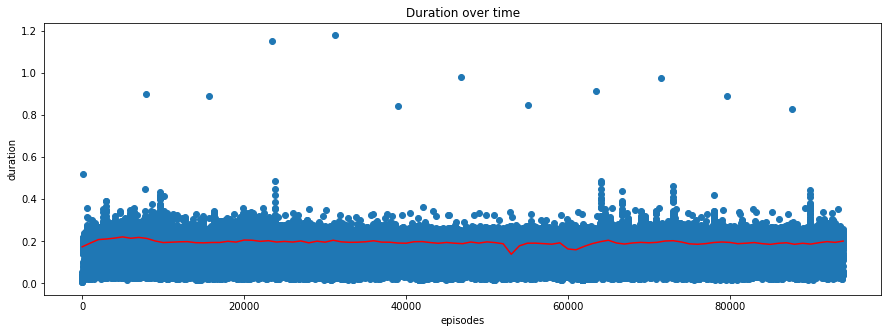

Maximum: 1.1783227820051252
Average: 0.19458063466330838
Moving Average: ['+10% (0 | 10%)', '+8% (0 | 19%)', '+1% (0 | 21%)', '+2% (0 | 23%)', '+2% (0 | 27%)', '-2% (0 | 23%)', '+1% (0 | 25%)', '-2% (0 | 22%)', '-5% (0 | 15%)', '-3% (0 | 11%)', '+0% (0 | 12%)', '+0% (0 | 13%)', '+0% (0 | 14%)', '-2% (0 | 11%)', '0% (0 | 10%)', '+0% (0 | 11%)', '+0% (0 | 11%)', '+2% (0 | 15%)', '-1% (0 | 12%)', '+4% (0 | 18%)', '0% (0 | 17%)', '-2% (0 | 14%)', '+1% (0 | 16%)', '-3% (0 | 13%)', '+1% (0 | 14%)', '-1% (0 | 12%)', '+2% (0 | 15%)', '-4% (0 | 10%)', '+4% (0 | 15%)', '-2% (0 | 12%)', '+4% (0 | 17%)', '-3% (0 | 13%)', '-1% (0 | 12%)', '+0% (0 | 12%)', '+1% (0 | 13%)', '+2% (0 | 16%)', '-3% (0 | 12%)', '0% (0 | 12%)', '-1% (0 | 10%)', '0% (0 | 9%)', '+3% (0 | 13%)', '+0% (0 | 14%)', '-2% (0 | 11%)', '-1% (0 | 9%)', '+1% (0 | 11%)', '-1% (0 | 9%)', '-1% (0 | 8%)', '+4% (0 | 13%)', '-2% (0 | 10%)', '+3% (0 | 13%)', '-1% (0 | 11%)', '-2% (0 | 8%)', '-26% (0 | -20%)', '+28% (0 | 2%)', '+7% (0 | 9%)'

In [9]:
plot(duration, "Duration over time", "episodes", "duration")

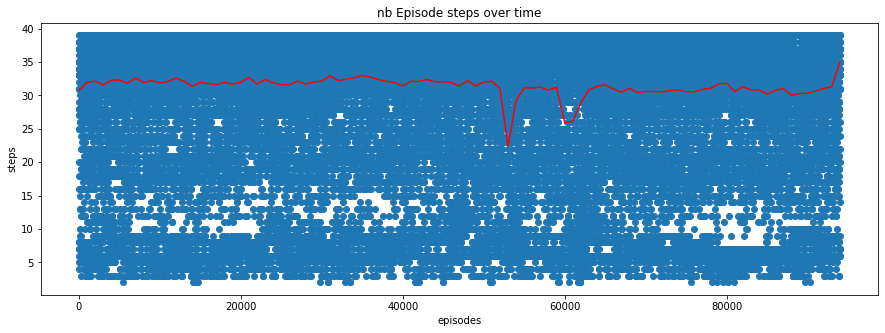

Maximum: 39
Average: 31.29220965734407
Moving Average: ['+4% (1 | 4%)', '+0% (0 | 4%)', '-1% (0 | 2%)', '+2% (0 | 4%)', '+0% (0 | 5%)', '-1% (0 | 3%)', '+2% (0 | 6%)', '-2% (0 | 3%)', '+0% (0 | 4%)', '-1% (0 | 3%)', '+0% (0 | 4%)', '+1% (0 | 6%)', '-1% (0 | 4%)', '-2% (0 | 2%)', '+1% (0 | 3%)', '0% (0 | 3%)', '0% (0 | 2%)', '+1% (0 | 3%)', '0% (0 | 3%)', '+1% (0 | 4%)', '+2% (0 | 6%)', '-3% (0 | 3%)', '+2% (0 | 5%)', '-1% (0 | 3%)', '0% (0 | 2%)', '0% (0 | 2%)', '+1% (0 | 4%)', '-1% (0 | 3%)', '+0% (0 | 4%)', '+0% (0 | 4%)', '+2% (0 | 7%)', '-2% (0 | 4%)', '+0% (0 | 5%)', '+0% (0 | 6%)', '+0% (0 | 7%)', '0% (0 | 6%)', '-1% (0 | 5%)', '0% (0 | 4%)', '0% (0 | 3%)', '-1% (0 | 2%)', '+2% (0 | 4%)', '0% (0 | 4%)', '+0% (0 | 5%)', '-1% (0 | 4%)', '+0% (0 | 4%)', '0% (0 | 3%)', '-1% (0 | 2%)', '+2% (0 | 4%)', '-2% (0 | 2%)', '+1% (0 | 4%)', '+0% (0 | 4%)', '-3% (-1 | 1%)', '-27% (-8 | -27%)', '+30% (6 | -4%)', '+6% (1 | 1%)', '0% (0 | 1%)', '+0% (0 | 1%)', '-1% (0 | 0%)', '+1% (0 | 1%)', '-16

In [10]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

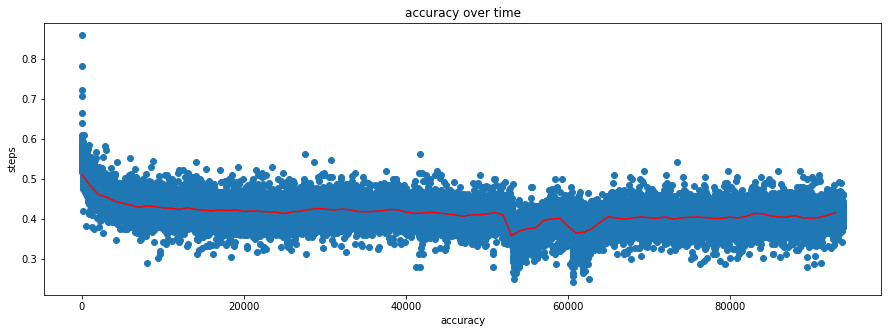

Maximum: 0.8585526315789473
Average: 0.4136930639902327
Moving Average: ['-5% (0 | -5%)', '-4% (0 | -9%)', '-1% (0 | -10%)', '-2% (0 | -12%)', '-1% (0 | -13%)', '-1% (0 | -14%)', '-1% (0 | -15%)', '+0% (0 | -15%)', '0% (0 | -15%)', '0% (0 | -16%)', '0% (0 | -16%)', '0% (0 | -16%)', '+0% (0 | -16%)', '0% (0 | -16%)', '0% (0 | -17%)', '0% (0 | -17%)', '+0% (0 | -17%)', '0% (0 | -17%)', '+0% (0 | -17%)', '0% (0 | -17%)', '+0% (0 | -17%)', '0% (0 | -17%)', '0% (0 | -18%)', '0% (0 | -18%)', '0% (0 | -18%)', '+1% (0 | -18%)', '+0% (0 | -17%)', '+0% (0 | -16%)', '+0% (0 | -16%)', '0% (0 | -16%)', '0% (0 | -17%)', '+0% (0 | -16%)', '0% (0 | -17%)', '0% (0 | -17%)', '0% (0 | -18%)', '+0% (0 | -17%)', '+0% (0 | -17%)', '+0% (0 | -16%)', '0% (0 | -17%)', '-1% (0 | -18%)', '0% (0 | -18%)', '+0% (0 | -18%)', '+0% (0 | -18%)', '0% (0 | -18%)', '0% (0 | -19%)', '0% (0 | -19%)', '0% (0 | -20%)', '+0% (0 | -19%)', '+0% (0 | -19%)', '+0% (0 | -19%)', '+0% (0 | -18%)', '-1% (0 | -19%)', '-12% (0 | -29%)'

In [11]:
plot(accuracy, "accuracy over time", "accuracy", "steps")